In [1]:
from common import load_track, GENRES
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K
from keras.layers import Input, Dense, Lambda, Dropout, Activation, \
        TimeDistributed, Convolution1D, MaxPooling1D, BatchNormalization
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
from optparse import OptionParser
from sys import stderr, argv
import os
import keras
from keras.models import load_model
from train_model import BATCH_SIZE

from create_data_pickle import get_default_shape



Using TensorFlow backend.


In [2]:
from __future__ import print_function
import os
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
#ms.use('seaborn-muted') % matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

audio_path = librosa.util.example_audio_file()

# or uncomment the line below and point it at your favorite song:
#




In [3]:
import easygui
testset_path=easygui.fileopenbox()


In [4]:


ys, sr = librosa.load(testset_path)




In [5]:
# Play it back!
IPython.display.Audio(data=ys, rate=sr)

In [6]:

# How about separating harmonic and percussive components?
ys_h, ys_p = librosa.effects.hpss(ys)

# Play the percussive component
IPython.display.Audio(data=ys_p, rate=sr)


In [7]:

savedModel=os.path.join(os.getcwd(),'models/model.h5')
model = load_model(savedModel)


savedData=os.path.join(os.getcwd(),'data/data.pkl')
with open(savedData, 'rb') as f:
    data = pickle.load(f)


labels = {0:"blues",1:"classical",2:'country', 3:'disco',4:'hiphop',5:'jazz',6:'metal',
        7:'pop',8:'reggae',9:'rock'}
# to feed model

#generator= train_datagen.flow_from_directory("data/genres", batch_size=BATCH_SIZE)
#label_map = (generator.class_indices)

#lb = pickle.loads(open(args["labelbin"], "rb").read())



In [8]:
# classify the input audio



x = data['x']

y = data['y']
t=data['track_paths']
print("classifying audio...")




classifying audio...


In [9]:

dataset_path=os.getcwd()+"/data/genres"

default_shape=get_default_shape(dataset_path)


TRACK_COUNT = 1000
test_pos=TRACK_COUNT
t1=np.zeros((TRACK_COUNT,) + default_shape, dtype=np.float32)
t1=x
#t1=t1.resize(2000,647,128)
#testset_path=os.getcwd()+'/test'


In [10]:
print(testset_path)
file_name='blues.00000.au'
print('Processing', file_name)
#path = os.path.join(testset_path, file_name)

t1, _ = load_track(testset_path, default_shape)



/media/infinity/New Volume/genres/blues/blues.00002.au
Processing blues.00000.au


hi /media/infinity/New Volume/genres/blues/blues.00002.au


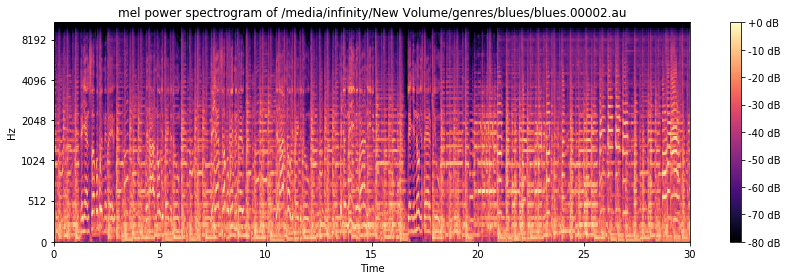

In [11]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(ys, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

print("hi",testset_path)
# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram of '+testset_path )

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [12]:

pred1=model.predict(np.array([t1]))[0]
predict_class=np.argmax(np.round(pred1))
index=predict_class

print("Prediction for the selected song is ",labels[index])

Prediction for the selected song is  blues
